# Titanic Disaster Pridiction Implementation



### Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("dataset/titanic_dataset.csv")

### View the data loaded into pandas dataframework

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: Exploratory Data Analysis (EDA)

### Checking for any NaN values in dataset

In [4]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


### Handling Missing Data

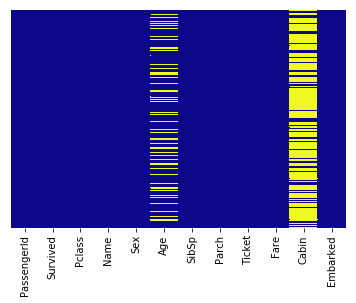

In [5]:
# View HeatMap
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='plasma')

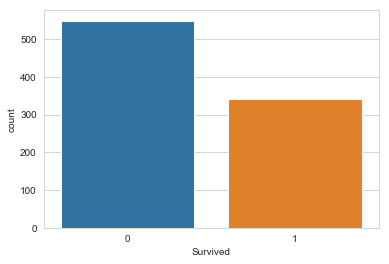

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

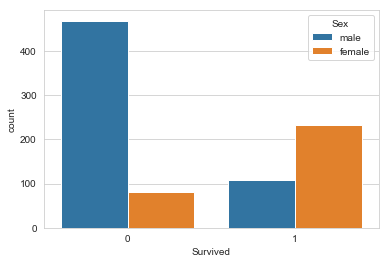

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data)

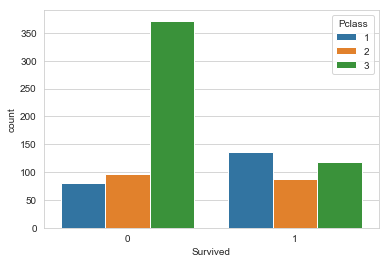

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


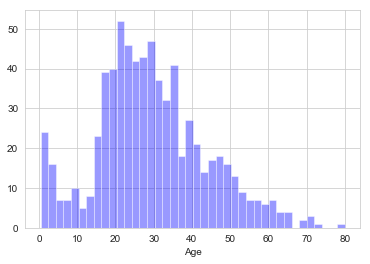

In [9]:
sns.distplot(data['Age'],bins=40,color='Blue',kde=False)

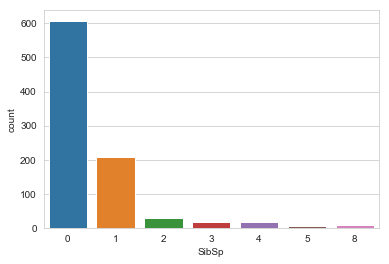

In [10]:
sns.countplot(x='SibSp',data=data)

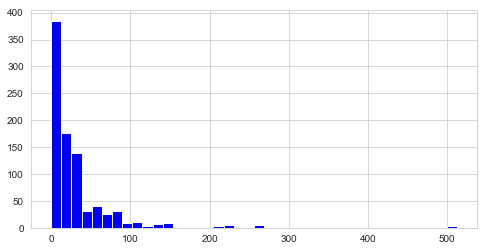

In [11]:
data['Fare'].hist(color='blue',bins=40,figsize=(8,4))

# Data Cleaning

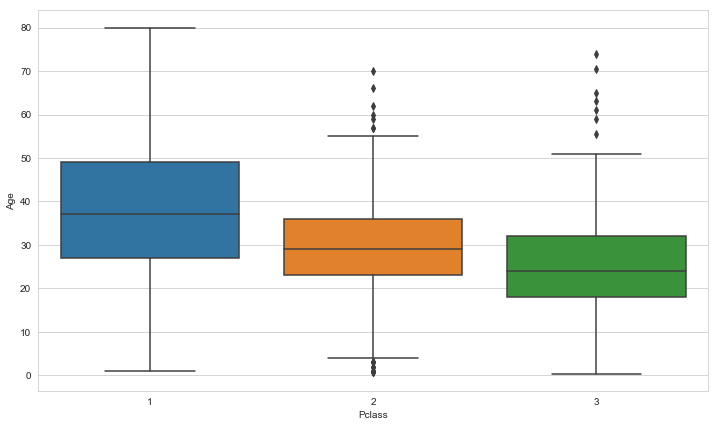

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data)

In [13]:
# Define a function to put median age for missing age based on Pclass

def age_transform(cols): 
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age): 
        
        if Pclass==1: 
            return 37
        
        elif Pclass==2: 
            return 29
        
        else: 
            return 24
    else: 
        return Age    

In [20]:
data['Age'] = data[['Age','Pclass']].apply(age_transform,axis=1)

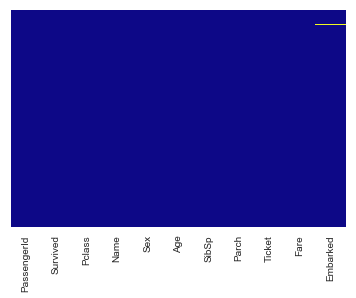

In [29]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [28]:
data.drop('Cabin',axis=1,inplace=True)

## Converting Categorical Features